# Titanic dataset
- We can found the dataset here [Kaggle Titanic dataset](https://www.kaggle.com/c/titanic/data).

# Tables of content

- [Preliminary Wrangling](#pri)
- [Univariate Exploration](#uni)
- [Bivariate Exploration](#bi)
- [Multivariate Exploration](mul)
- [Conculsions](#con)


<a id ='pri'></a>
## Preliminary Wrangling

> The titanic dataframe describes the survival status of individual passengers on the Titanic. The titanic dataframe does not contain information from the crew, but it does contain actual ages of half of the passengers.

**1. Import all packages and set plots to be embedded inline.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**2. Loadind my dataset, check it and describe its properties.**

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**3. The structure of the dataset.**

In [4]:
df.shape

(891, 12)

**4. The dataset information.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**5. Duplicates checking.**

In [6]:
df.duplicated().sum()

0

**6. Nullity checking.**

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**7. Drop Cabin column.**

In [8]:
df_clean = df.drop(['Cabin', 'SibSp', 'Parch'], axis = 1)
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S


**8. Fill null value of Age and Embarked With mode.**

In [9]:
nan_replacements = {'Age': df_clean['Age'].mode()[0],'Embarked': df_clean['Embarked'].mode()[0]}
tic = df_clean.fillna(nan_replacements)
tic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S


In [10]:
tic.shape

(891, 9)

**After Cleaning my new dataset is :**
> My dataset is 891 entries, 12 columns, after clean it up My newdata set is 891 entries, 9 columns.

**My main features of interest are:**
> - Age, Pclass, Embarked, Sex, Fare and Survived.

**Questions, I am try to answer:**
> - What is the sex of the most Survived Passengers?
- What is the class that had the higher of passengers?
- In which age, there were the most Died Passengers?
- Is there a relationship between Fare and Pclass?
- Is there a relationship between Fare and Survived?
- Is there a relationship between Age and Survived?

**Features in the dataset that will be support me:**
> - Age, Pclass, Embarked, Sex, Fare and Survived.

<a id='uni'></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers.

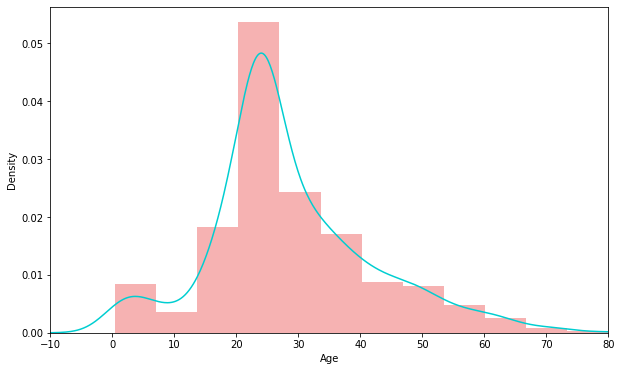

In [11]:
# Figure size.
plt.rcParams['figure.figsize'] = 10, 6
# The distribution of Passengers Ages.
ax = tic['Age'].hist(bins = 12, density = True, stacked = True, color = 'lightcoral', alpha = 0.6)
tic['Age'].plot(kind = 'density', color = 'darkturquoise')
# The figre label.
ax.set(xlabel ='Age')
# The range of x-axis.
plt.xlim(-10, 80)
plt.show()

> **Age Distribution is Right Skewed.**
 - Because of using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [12]:
# The mean of age.
print('The mean of Age is %.2f' %(tic['Age'].mean(skipna=True)))
# The median of age.
print('The median of Age is %.2f' %(tic['Age'].median(skipna=True)))

The mean of Age is 28.57
The median of Age is 24.00


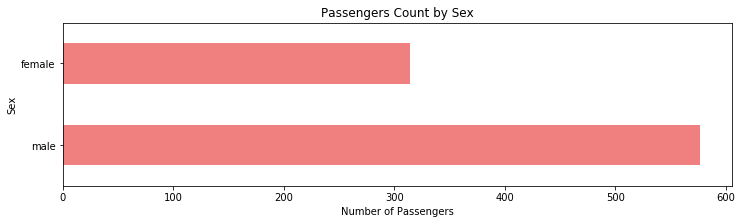

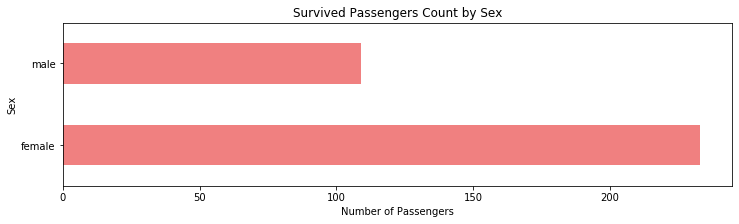

In [13]:
# Value Counts of Sex coulmn. 
n_sex = tic["Sex"].value_counts()

# Summation of Survived Classes grouped by Sex.
g_surv = tic.groupby('Sex')['Survived'].sum()

# Visualization of n_sex.
n_sex.plot(kind = 'barh', figsize = (12, 3), color = 'lightcoral' , 
          title = 'Passengers Count by Sex').set_xlabel('Number of Passengers');
plt.ylabel('Sex')
plt.figure();

# Visualization of g_surv.
g_surv.plot(kind = 'barh', figsize = (12, 3), color = 'lightcoral' , 
          title = 'Survived Passengers Count by Sex').set_xlabel('Number of Passengers');

>**We observed that:**
- The Male Passengers were more than Female passengers, but:
- The Female Passengers that survived were more than male passengers.

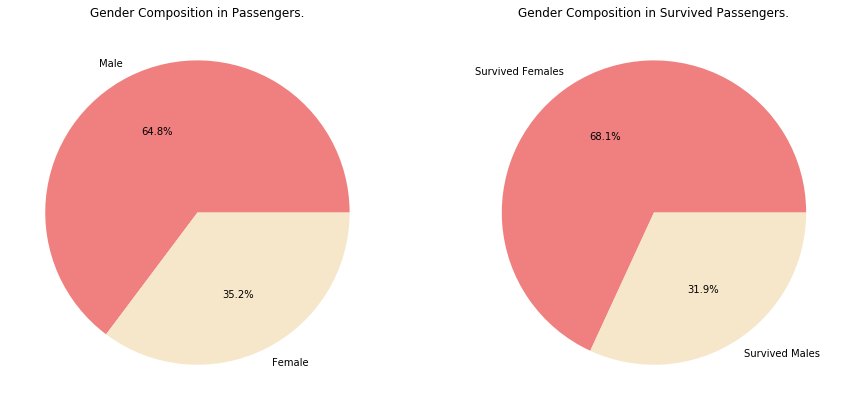

In [14]:
# ax1,ax2 refer to the two pie charts.
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15, 12))

colors = ['lightcoral', '#f6e7cb']
labels = ['Male', 'Female']

# Visualization for Gender Composition in Passengers.
ax1.pie(n_sex, labels = labels, colors = colors, autopct = "%.1f%%");
ax1.set_title('Gender Composition in Passengers.')

# Visualization for Gender Composition in Survived Passengers.
labels = ['Survived Females', 'Survived Males']
ax2.pie(g_surv, labels = labels, colors = colors, autopct = "%.1f%%");
ax2.set_title('Gender Composition in Survived Passengers.');

> **We observed that:**
- The Female Passengers were the more survived male passengers.
- The Female Passengers that survived had 68.1% of the all survived people.
- The Male Passengers that survived had 31.9% of the all survived people.

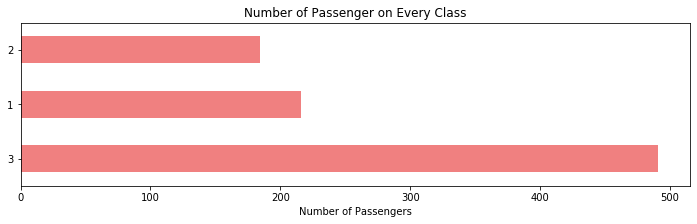

In [15]:
# Value counts of Pclass Column.
n_class = tic['Pclass'].value_counts()
# plot counts of passengers by class
n_class.plot(kind = 'barh', figsize = (12, 3), color = 'lightcoral', title = 
               'Number of Passenger on Every Class').set_xlabel('Number of Passengers');

In [16]:
# checking to see whether number of other two classes is more or less than number of lower class passengers
n_class[3] > n_class[1] + n_class[2]

True

> **The number of the 3rd class passengers is more than the total number of the other classes.**

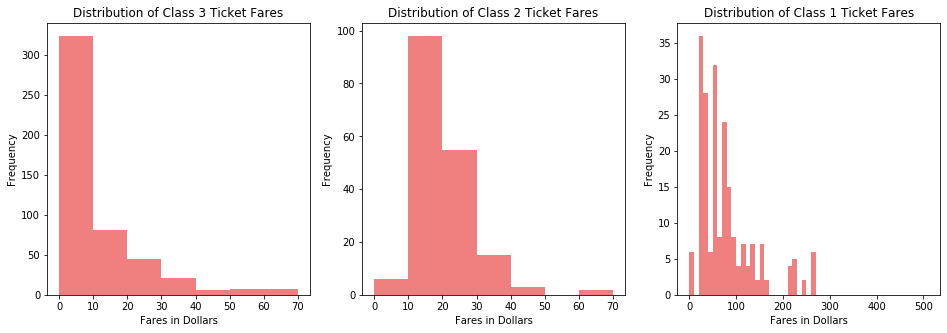

In [17]:
# ax1,ax2, ax3 refer to your the three histograms.
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,5))

# Fares of the trip grouped by Pclass. 
fares_pclass = tic[['Fare', 'Pclass']]

# Function to the count the frequencies of Fares by each Pclass.
def fare_dist_cls(ax, fares_class, pclass = 3,bin_width=10):
    cl_frs = fares_class[fares_class['Pclass'] == pclass]['Fare']
    bins = range(int(round(min(cl_frs),-1)), int(round((max(cl_frs)+10), -1)), bin_width)
    ax.set_title('Distribution of Class %s Ticket Fares'%pclass)
    ax.set(xlabel = 'Fares in Dollars', ylabel = 'Frequency')
    return cl_frs, bins

# Visualization of Distribution of 3rd Class Fares                           
data, bn = fare_dist_cls(ax1, fares_pclass)
ax1.hist(data, bins = bn, color ='lightcoral')

# Visualization of Distribution of 2nd Class Fares 
data, bn = fare_dist_cls(ax2, fares_pclass, pclass = 2)
ax2.hist(data, bins = bn, color = 'lightcoral')

# Visualization of Distribution of 1st Class Fares 
data, bn = fare_dist_cls(ax3, fares_pclass, pclass = 1, bin_width = 10)
ax3.hist(data, bins = bn, color = 'lightcoral');

>**From the distributions between each passenger classes and its fares, We observed that:**
- The majority of the 3rd class fares were between 0 dollar and 10 dollars.
- The majority of the 2nd class fares were between 10 dollars and 20 dollars.
- The majority of the 1st class fares were between 30 dollars and 40 dollars.

<a id='bi'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

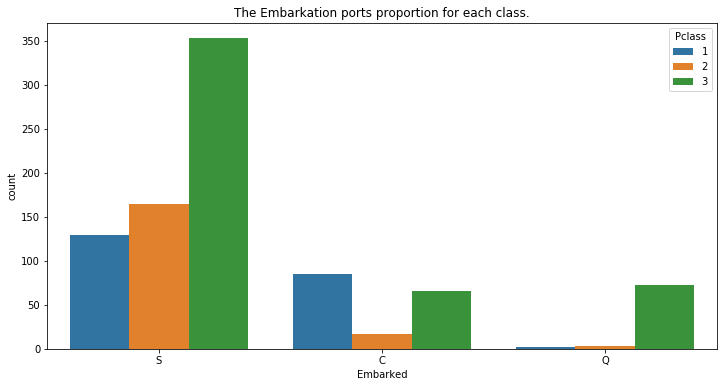

In [18]:
# Figure size.
plt.figure(figsize=(12, 6))
# Visualization.
g = sns.countplot(x = 'Embarked', hue = 'Pclass', data = tic)
plt.title('The Embarkation ports proportion for each class.');

> **The 3rd class was the most class in all Emabrkation Ports.**

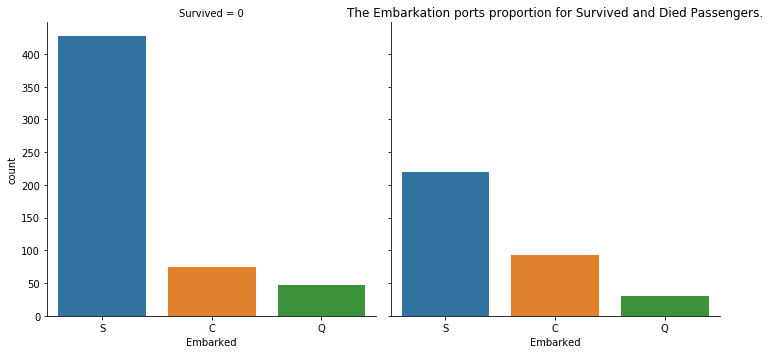

In [19]:
# Visualization.
g = sns.catplot(x = 'Embarked', col = 'Survived', data = tic, kind = 'count')
plt.title('The Embarkation ports proportion for Survived and Died Passengers.');

> **The Embarktaion Port "S" had the most Survived and Died passengers.**

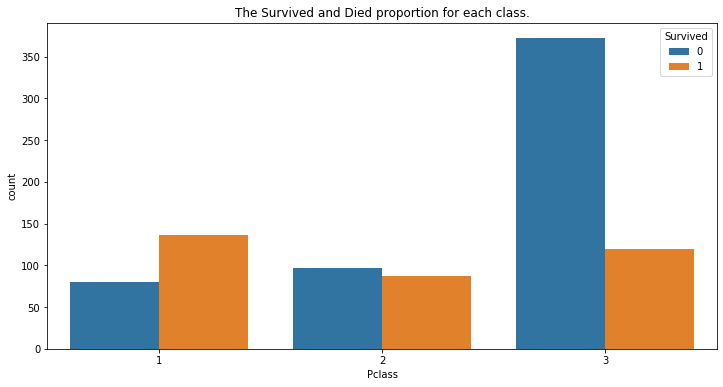

In [20]:
# Figue Size.
plt.figure(figsize=(12, 6))
# Visualization.
g = sns.countplot(x = 'Pclass', hue = 'Survived', data = tic)
plt.title('The Survived and Died proportion for each class.');

> **The most Died Passengers were in the 3rd class.**
> **The most Survived Passengers were in the 1st class.**

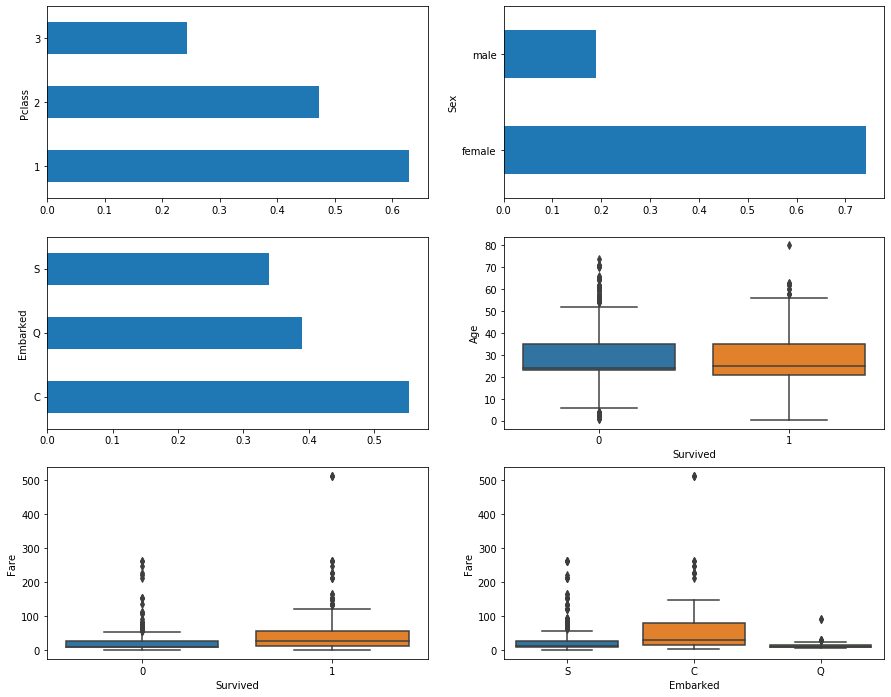

In [21]:
# Figure Size and position axes
fig, axs = plt.subplots(3, 2, figsize=(15, 12))
# visualization.
tic.groupby('Pclass')['Survived'].mean().plot(kind = 'barh',ax = axs[0, 0])
tic.groupby('Sex')['Survived'].mean().plot(kind = 'barh', ax = axs[0, 1])
tic.groupby('Embarked')['Survived'].mean().plot(kind = 'barh', ax = axs[1, 0])
sns.boxplot(x = 'Survived', y = 'Age', data = tic,ax=axs[1, 1])
sns.boxplot(x = 'Survived', y = 'Fare', data = tic, ax = axs[2, 0])
sns.boxplot(x = 'Embarked', y = 'Fare', data = tic, ax = axs[2, 1]);

>**In ports of Emabarkation S and C, The 1st class tickets noted well in the figure. Not only these tickets prices are high than other classes ticket. But, We noticed that the 1st class tickets are different from person to another.**

<a id='mul'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

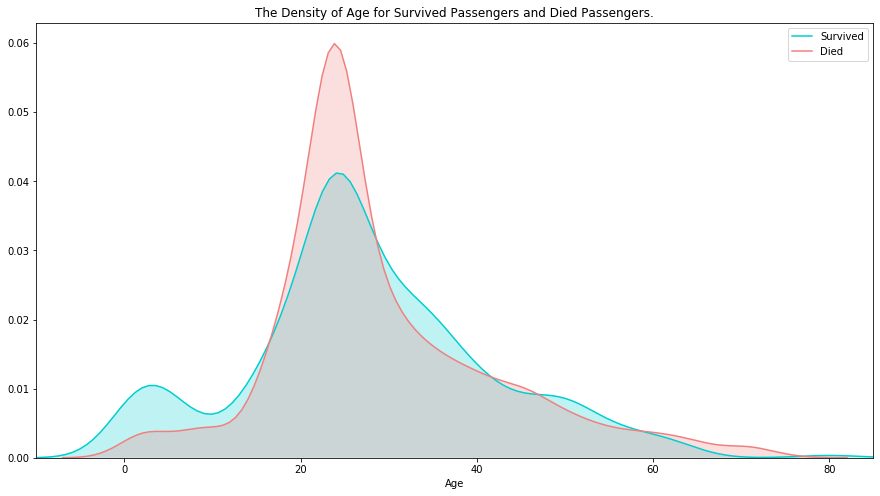

In [22]:
# Figure Size
plt.figure(figsize=(15, 8))
ax = sns.kdeplot(tic['Age'][tic.Survived == 1], color = 'darkturquoise', shade=True)
sns.kdeplot(tic['Age'][tic.Survived == 0], color = 'lightcoral', shade=True)
plt.legend(['Survived', 'Died'])
plt.title('The Density of Age for Survived Passengers and Died Passengers.')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show();

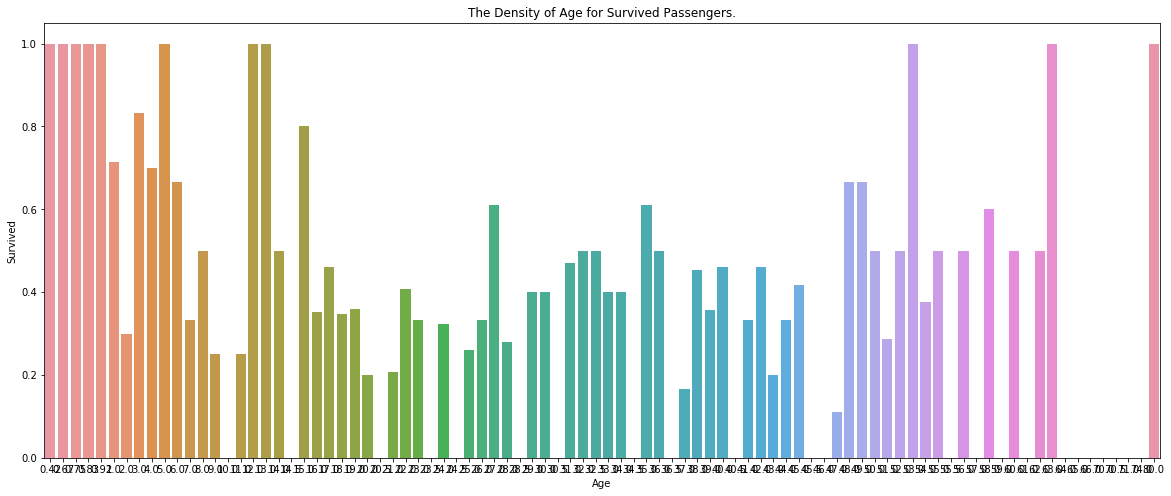

In [23]:
# Figure size.
plt.figure(figsize=(20, 8))
# Select Age and Survived Columns.
avg_surv = tic[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()
#Visulalization.
g = sns.barplot(x='Age', y='Survived', data = avg_surv)
plt.title('The Density of Age for Survived Passengers.')
plt.show();

> **We noticed that:**
- The age distribution for Survived Passengers and Died Passengers was actually similar.
- The difference between them is that, of the Died Passengers, a larger proportion were children.

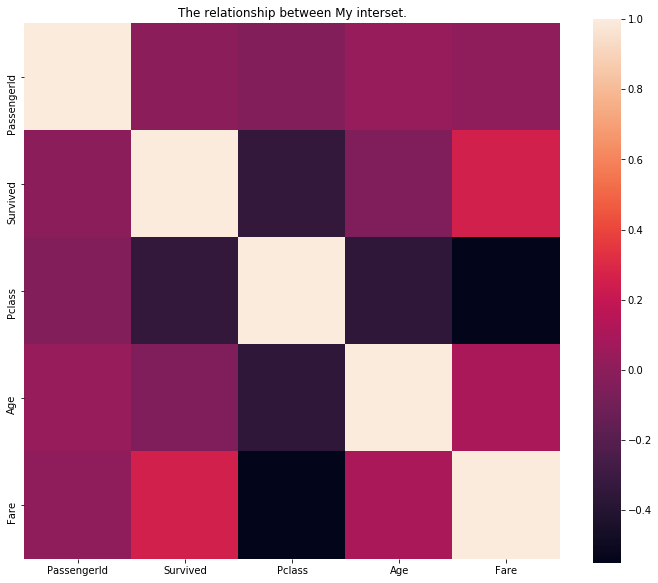

In [24]:
f, ax = plt.subplots(figsize=(12, 10))
corr = tic.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), square=True, ax=ax)
plt.title('The relationship between My interset.');

> **We noticed that:**
- There is a positve corelation between Fare and Survived and a negative corelation between Pclass and Surived
- There is a negative corelation between Fare and Pclass, Age and Plcass

## Conclusion and My Answers to Questions
**1. What is the sex of the most Survived Passengers?**<br>
>The Female Passengers that survived were more than male passengers.<br>

**2. What is the class that had the higher of passengers?**<br>
>The number of the 3rd class passengers is more than the total number of the other classes.<br>

**3. In which age, there were the most Died Passengers?**<br>
>At the range between 15 and 36.<br>

**4. Is there a relationship between Fare and Pclass?**<br>
>Yes, There is a negative corelation between Fare and Pclass.<br>

**5. Is there a relationship between Fare and Survived?**<br>
>Yes, There is a positve corelation between Fare and Survived.

## *THANK YOU!!!*